### Exercise 3.6: Dealing with High-Dimensional Data

1.	Create a list ‘cluster_cols’ containing the columns, ‘Age’, ‘Income’ and ‘Spend_score’ that will be used for clustering. Print the first 3 rows of the dataset for these columns.

In [36]:
cluster_cols = ['Age', 'Income', 'Spend_score']
data_scaled[cluster_cols].head(3)

,Age,Income,Spend_score
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913


2. Perform k-means clustering specifying 4 clusters using the scaled features. Specify random_state as 42. Assign the clusters to the ‘Cluster’ column.

In [37]:
model = KMeans(n_clusters=4, random_state=42)
model.fit(data_scaled[cluster_cols])

KMeans(n_clusters=4, random_state=42)

In [38]:
data_scaled['Cluster'] = model.predict(data_scaled[cluster_cols])

3. Using PCA on the scaled columns, create new columns 'pc1' and 'pc2' containing the data for PC1 and PC2 respectively.

In [39]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca_res = pca.fit_transform(data_scaled[cluster_cols])

data_scaled['pc1'] = pca_res[:,0]
data_scaled['pc2'] = pca_res[:,1]

4.	Visualize the clusters by using different markers and colours for the clusters on a scatterplot between 'pc1' and 'pc2' using the code below.

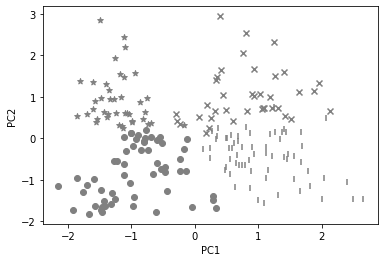

In [41]:
markers = ['x', '*', 'o','|']

for clust in range(4):
    temp = data_scaled[data_scaled.Cluster == clust]
    plt.scatter(temp.pc1, temp.pc2, marker=markers[clust], \
                label="Cluster "+str(clust), \
                color='gray')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

5.	Understanding the clusters   
    a.	Print the avg. values of the original features used for clustering against the four clusters.  
    b.	For a visual analysis, plot the average values for these features against the clusters.  
    c.	Which features are the most differentiated for the clusters?


In [42]:
data0['Cluster'] = data_scaled.Cluster

In [43]:
data0.groupby('Cluster')[['Age', 'Income', 'Spend_score']].mean()

,Age,Income,Spend_score
Cluster,,,
0,39.368421,86.500000,19.578947
1,32.875000,86.100000,81.525000
2,25.438596,40.000000,60.298246
3,53.984615,47.707692,39.969231


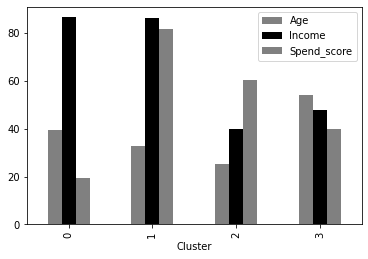

In [45]:
data0.groupby('Cluster')[['Age', 'Income', \
                          'Spend_score']].mean() \
                          .plot.bar(color=['gray', 'black'])
plt.show()